In [2]:
from tensorflow import keras
import tensorflow as tf
import pickle
from tensorflow.keras.layers import Flatten, Dense, Input
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn import metrics

In [5]:
Trpath="D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 3\Group_11\\train"
TrClss=os.listdir(Trpath)
TrData=[]
TrLabel=[]
num=0
for i in TrClss:
    path=Trpath+"\\"+i
    ClssFile=os.listdir(path)
    for j in ClssFile:
        l=np.array([0,0,0,0,0])
        filepath=path+"\\"+j
        img=plt.imread(filepath)
        #print(img)
        # img1D=img.flatten()
        #print(img1D)
        TrData.append(img)
        l[num]+=1
        TrLabel.append(l)
    num+=1
TrData=np.array(TrData)
TrLabel=np.array(TrLabel)


In [52]:
print(TrData[0].shape)
print(TrLabel.shape)
print(np.shape(TrData))
print(np.shape(TrLabel))

(28, 28)
(11385, 5)
(11385, 28, 28)
(11385, 5)


In [6]:
Testpath="D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 3\Group_11\\test"
TestClss=os.listdir(Testpath)
TestData=[]
TestLabel=[]
num=0
for i in TestClss:
    path=Testpath+"\\"+i
    ClssFile=os.listdir(path)
    for j in ClssFile:
        l=np.array([0,0,0,0,0])
        filepath=path+"\\"+j
        img=plt.imread(filepath)
        #print(img)
        # img1D=img.flatten()
        #print(img1D)
        TestData.append(img)
        l[num]+=1
        TestLabel.append(l)
    num+=1
TestData=np.array(TestData)
TestLabel=np.array(TestLabel)

In [54]:
print(len(TestData))
print(len(TestLabel))
print(np.shape(TestData))
print(np.shape(TestLabel))

3795
3795
(3795, 28, 28)
(3795, 5)


In [6]:
Valpath="D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 3\Group_11\\val"
ValClss=os.listdir(Valpath)
ValData=[]
ValLabel=[]
num=0
for i in ValClss:
    path=Valpath+"\\"+i
    ClssFile=os.listdir(path)
    for j in ClssFile:
        l=np.array([0,0,0,0,0])
        filepath=path+"\\"+j
        img=plt.imread(filepath)
        #print(img)
        # img1D=img.flatten()
        #print(img1D)
        ValData.append(img)
        l[num]+=1
        ValLabel.append(l)
    num+=1
ValData=np.array(ValData)
ValLabel=np.array(ValLabel)

In [56]:
print(len(ValData))
print(len(ValLabel))
print(np.shape(ValData))
print(np.shape(ValLabel))

3795
3795
(3795, 28, 28)
(3795, 5)


In [45]:
Initialiser=keras.initializers.RandomUniform(minval=0,maxval=1,seed=True)


In [46]:
model1 = keras.Sequential(
    [
        Input((28,28)),
        Flatten(),
        Dense(512, activation='sigmoid', name="layer1"),
        Dense(256, activation='sigmoid', name="layer2" ),
        Dense(128, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)
# x = tf.ones((784,))
# y = model(x)

ValueError: Can't convert Python sequence with mixed types to Tensor.

In [29]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 512)               401920    
                                                                 
 layer2 (Dense)              (None, 256)               131328    
                                                                 
 layer3 (Dense)              (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 5)                 645       
                                                                 
Total params: 566,789
Trainable params: 566,789
Non-trainable params: 0
_________________________________________________________________


In [32]:
# model3layer = keras.Sequential(
#     [
#     Input(),
#     Dense(512, activation='sigmoid', kernel_initializer=Initialiser, name='h1'),
#     Dense(256, activation='sigmoid', kernel_initializer=Initialiser, name='h2'),
#     Dense(128, activation='sigmoid', kernel_initializer=Initialiser, name='h3'),
#     Dense(5, activation='softmax', kernel_initializer=Initialiser, name='output'),
#     ], name='3Layer-model'
# )
# model3layer.build((784,))

Stochastic Gradient Decent

In [30]:
sgd=keras.optimizers.SGD(learning_rate=0.001)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1)]
model1.compile(optimizer=sgd,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])


In [31]:
history1SGD = model1.fit(x=TrData,y=TrLabel,batch_size=1,epochs=10000,validation_split=0,validation_data=(ValData,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)


Epoch 1/10000
11385/11385 [==============================] - 170s 15ms/step - loss: 1.1585 - accuracy: 0.7189 - val_loss: 0.5730 - val_accuracy: 0.9310
Epoch 2/10000
11385/11385 [==============================] - 152s 13ms/step - loss: 0.3406 - accuracy: 0.9424 - val_loss: 0.2179 - val_accuracy: 0.9544
Epoch 3/10000
11385/11385 [==============================] - 153s 13ms/step - loss: 0.1775 - accuracy: 0.9572 - val_loss: 0.1525 - val_accuracy: 0.9626
Epoch 4/10000
11385/11385 [==============================] - 155s 14ms/step - loss: 0.1344 - accuracy: 0.9657 - val_loss: 0.1308 - val_accuracy: 0.9671
Epoch 5/10000
11385/11385 [==============================] - 155s 14ms/step - loss: 0.1131 - accuracy: 0.9716 - val_loss: 0.1129 - val_accuracy: 0.9679
Epoch 6/10000
11385/11385 [==============================] - 157s 14ms/step - loss: 0.0998 - accuracy: 0.9751 - val_loss: 0.1051 - val_accuracy: 0.9705
Epoch 7/10000
11385/11385 [==============================] - 186s 16ms/step - loss: 0.09

In [34]:
model1.save('SGDmodel.h5')

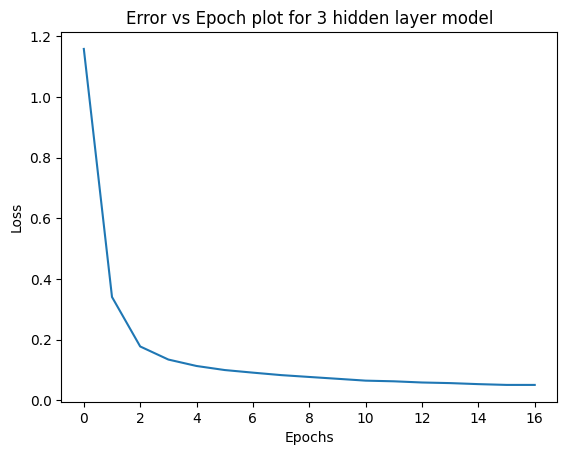

In [38]:
loss1SGD=history1SGD.history['loss']
plt.plot(loss1SGD)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [39]:
model1.evaluate(x=TrData, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)

356/356 [==============================] - 7s 16ms/step - loss: 0.0469 - accuracy: 0.9880


[0.04685407504439354, 0.9879665970802307]

In [40]:
model1.evaluate(x=ValData,y=ValLabel,batch_size=None,verbose="auto",callbacks=None)

119/119 [==============================] - 2s 13ms/step - loss: 0.0723 - accuracy: 0.9781


[0.07229500263929367, 0.9781290888786316]

In [85]:
model2 = keras.Sequential(
    [
        Input((28,28)),
        Flatten(),
        Dense(100, activation='sigmoid', name="layer1"),
        Dense(200, activation='sigmoid', name="layer2"),
        Dense(100, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)

In [86]:
model2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 100)               78500     
                                                                 
 layer2 (Dense)              (None, 200)               20200     
                                                                 
 layer3 (Dense)              (None, 100)               20100     
                                                                 
 dense_16 (Dense)            (None, 5)                 505       
                                                                 
Total params: 119,305
Trainable params: 119,305
Non-trainable params: 0
_________________________________________________________________


In [87]:
sgd=keras.optimizers.SGD(learning_rate=0.001)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',patience=1,min_delta=0.0001)]
model2.compile(optimizer=sgd,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [88]:
history2SGD = model2.fit(x=TrData,y=TrLabel,batch_size=1,epochs=10000,validation_split=0,validation_data=(ValData,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
11385/11385 [==============================] - 132s 11ms/step - loss: 1.4099 - accuracy: 0.5471 - val_loss: 1.0849 - val_accuracy: 0.8759
Epoch 2/10000
11385/11385 [==============================] - 103s 9ms/step - loss: 0.7298 - accuracy: 0.8837 - val_loss: 0.4579 - val_accuracy: 0.9236
Epoch 3/10000
11385/11385 [==============================] - 95s 8ms/step - loss: 0.3365 - accuracy: 0.9365 - val_loss: 0.2563 - val_accuracy: 0.9462
Epoch 4/10000
11385/11385 [==============================] - 82s 7ms/step - loss: 0.2257 - accuracy: 0.9478 - val_loss: 0.2050 - val_accuracy: 0.9473
Epoch 5/10000
11385/11385 [==============================] - 105s 9ms/step - loss: 0.1896 - accuracy: 0.9534 - val_loss: 0.1739 - val_accuracy: 0.9576
Epoch 6/10000
11385/11385 [==============================] - 102s 9ms/step - loss: 0.1690 - accuracy: 0.9557 - val_loss: 0.1779 - val_accuracy: 0.9544
Epoch 7/10000
11385/11385 [==============================] - 84s 7ms/step - loss: 0.1669 - accu

In [89]:
model2.save('SGDmodel2.h5')

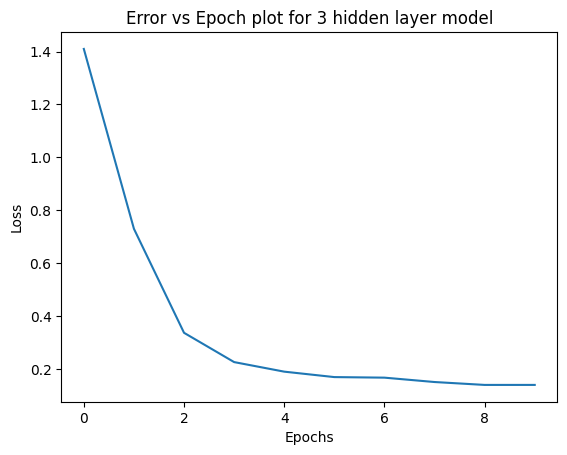

In [90]:
loss2SGD=history2SGD.history['loss']
plt.plot(loss2SGD)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [91]:
model2.evaluate(x=TrData, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)

356/356 [==============================] - 6s 13ms/step - loss: 0.1223 - accuracy: 0.9678


[0.12233848124742508, 0.9677646160125732]

In [92]:
model2.evaluate(x=ValData, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 2s 11ms/step - loss: 0.1307 - accuracy: 0.9631


[0.13068020343780518, 0.9631093740463257]

In [52]:
model3 = keras.Sequential(
    [
        Input((28,28)),
        Flatten(),
        Dense(200, activation='sigmoid', name="layer1"),
        Dense(300, activation='sigmoid', name="layer2"),
        Dense(500, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)

In [53]:
model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 200)               157000    
                                                                 
 layer2 (Dense)              (None, 300)               60300     
                                                                 
 layer3 (Dense)              (None, 500)               150500    
                                                                 
 dense_7 (Dense)             (None, 5)                 2505      
                                                                 
Total params: 370,305
Trainable params: 370,305
Non-trainable params: 0
_________________________________________________________________


In [54]:
sgd=keras.optimizers.SGD(learning_rate=0.001)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',patience=1,min_delta=0.0001)]
model3.compile(optimizer=sgd,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [55]:
history3SGD = model3.fit(x=TrData,y=TrLabel,batch_size=1,epochs=10000,validation_split=0,validation_data=(ValData,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
11385/11385 [==============================] - 172s 15ms/step - loss: 1.4112 - accuracy: 0.4751 - val_loss: 0.9666 - val_accuracy: 0.8445
Epoch 2/10000
11385/11385 [==============================] - 217s 19ms/step - loss: 0.5459 - accuracy: 0.9150 - val_loss: 0.3120 - val_accuracy: 0.9436
Epoch 3/10000
11385/11385 [==============================] - 226s 20ms/step - loss: 0.2265 - accuracy: 0.9499 - val_loss: 0.1966 - val_accuracy: 0.9549
Epoch 4/10000
11385/11385 [==============================] - 179s 16ms/step - loss: 0.1656 - accuracy: 0.9587 - val_loss: 0.1472 - val_accuracy: 0.9607
Epoch 5/10000
11385/11385 [==============================] - 172s 15ms/step - loss: 0.1429 - accuracy: 0.9615 - val_loss: 0.1469 - val_accuracy: 0.9615
Epoch 6/10000
11385/11385 [==============================] - 169s 15ms/step - loss: 0.1321 - accuracy: 0.9647 - val_loss: 0.1292 - val_accuracy: 0.9631
Epoch 7/10000
11385/11385 [==============================] - 212s 19ms/step - loss: 0.12

In [150]:
model3.save('SGDmodel3.h5')

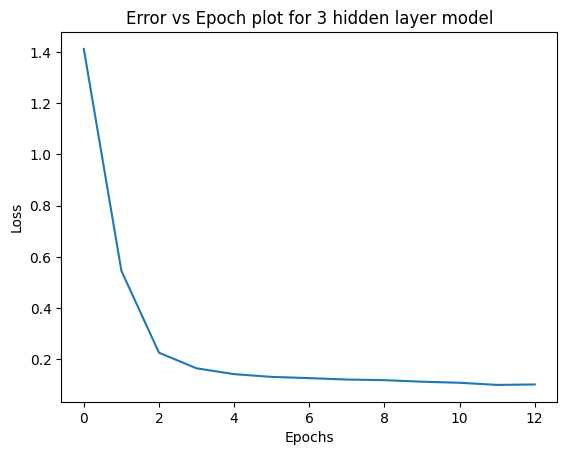

In [56]:
loss3SGD=history3SGD.history['loss']
plt.plot(loss3SGD)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [57]:
model3.evaluate(x=TrData, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)

356/356 [==============================] - 8s 19ms/step - loss: 0.0986 - accuracy: 0.9729


[0.0986035019159317, 0.9728590250015259]

In [153]:
model3.evaluate(x=ValData, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 2s 17ms/step - loss: 0.1166 - accuracy: 0.9655


[0.11656702309846878, 0.9654809236526489]

Gradient Decent with momentum

In [25]:
model4 = keras.Sequential(
    [
        Input((28,28)),
        Flatten(),
        Dense(512, activation='sigmoid', name="layer1"),
        Dense(256, activation='sigmoid', name="layer2"),
        Dense(128, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)

In [95]:
msgd=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,name='Momentum_SGD')
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',patience=1,min_delta=0.0001)]
model4.compile(optimizer=msgd,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [96]:
historyMSGD1 = model4.fit(x=TrData,y=TrLabel,batch_size=1,epochs=10000,validation_split=0,validation_data=(ValData,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
11385/11385 [==============================] - 311s 27ms/step - loss: 0.7560 - accuracy: 0.7127 - val_loss: 0.6044 - val_accuracy: 0.7576
Epoch 2/10000
11385/11385 [==============================] - 282s 25ms/step - loss: 0.6481 - accuracy: 0.7574 - val_loss: 1.0296 - val_accuracy: 0.6195
Epoch 3/10000
11385/11385 [==============================] - 284s 25ms/step - loss: 0.8708 - accuracy: 0.6632 - val_loss: 0.8590 - val_accuracy: 0.6458


In [97]:
model4.save('MSGDmodel4.h5')

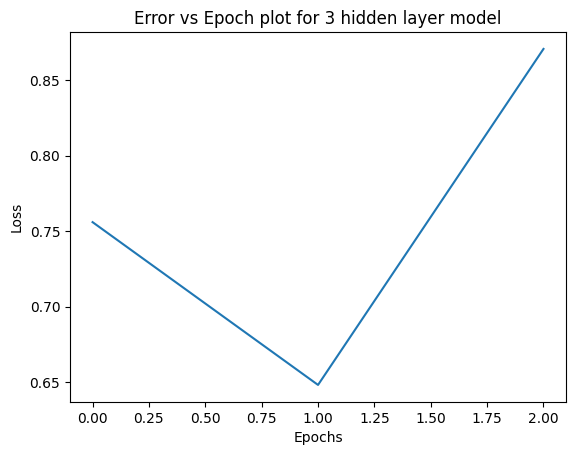

In [98]:
loss1MSGD=historyMSGD1.history['loss']
plt.plot(loss1MSGD)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [99]:
model4.evaluate(x=TrData, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)

356/356 [==============================] - 9s 20ms/step - loss: 0.8540 - accuracy: 0.6574


[0.8539935946464539, 0.6574440002441406]

In [100]:
model4.evaluate(x=ValData, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 2s 19ms/step - loss: 0.8590 - accuracy: 0.6458


[0.8589659333229065, 0.6458498239517212]

In [101]:
model10 = keras.Sequential(
    [
        Input((28,28)),
        Flatten(),
        Dense(100, activation='sigmoid', name="layer1"),
        Dense(200, activation='sigmoid', name="layer2"),
        Dense(100, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)

In [102]:
msgd=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,name='Momentum_SGD')
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1)]
model10.compile(optimizer=msgd,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [103]:
history2MSGD = model10.fit(x=TrData,y=TrLabel,batch_size=1,epochs=10000,validation_split=0,validation_data=(ValData,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
11385/11385 [==============================] - 152s 13ms/step - loss: 0.8676 - accuracy: 0.6788 - val_loss: 1.0513 - val_accuracy: 0.5576
Epoch 2/10000
11385/11385 [==============================] - 144s 13ms/step - loss: 1.0655 - accuracy: 0.5543 - val_loss: 1.0027 - val_accuracy: 0.5968


In [108]:
model10.save('MSGDmodel10.h5')

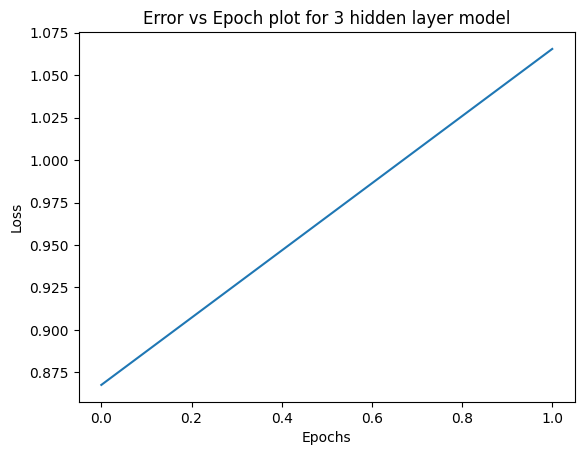

In [104]:
loss2MSGD=history2MSGD.history['loss']
plt.plot(loss2MSGD)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [105]:
model10.evaluate(x=TrData, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)

356/356 [==============================] - 6s 12ms/step - loss: 1.0338 - accuracy: 0.5836


[1.0338119268417358, 0.5835748910903931]

In [106]:
model10.evaluate(x=ValData, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 2s 16ms/step - loss: 1.0027 - accuracy: 0.5968


[1.0027110576629639, 0.5968379378318787]

In [48]:
model16 = keras.Sequential(
    [
        Input((28,28)),
        Flatten(),
        Dense(200, activation='sigmoid', name="layer1"),
        Dense(300, activation='sigmoid', name="layer2"),
        Dense(500, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)

In [49]:
msgd=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,name='Momentum_SGD')
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1)]
model16.compile(optimizer=msgd,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [50]:
history3MSGD = model16.fit(x=TrData,y=TrLabel,batch_size=1,epochs=10000,validation_split=0,validation_data=(ValData,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
11385/11385 [==============================] - 223s 19ms/step - loss: 0.7853 - accuracy: 0.7014 - val_loss: 0.6966 - val_accuracy: 0.7241
Epoch 2/10000
11385/11385 [==============================] - 273s 24ms/step - loss: 0.9398 - accuracy: 0.6196 - val_loss: 0.7205 - val_accuracy: 0.7149


In [157]:
model16.save('MSGDmodel16.h5')

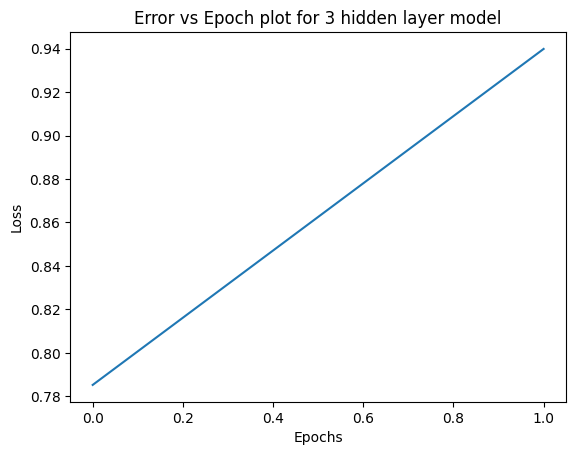

In [51]:
loss3MSGD=history3MSGD.history['loss']
plt.plot(loss3MSGD)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [159]:
model16.evaluate(x=TrData, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)

356/356 [==============================] - 7s 18ms/step - loss: 0.6455 - accuracy: 0.7773


[0.645451009273529, 0.7773386240005493]

In [160]:
model16.evaluate(x=ValData, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 2s 19ms/step - loss: 0.6530 - accuracy: 0.7773


[0.6529724597930908, 0.7773386240005493]

NAG Optimizer

In [16]:
model5 = keras.Sequential(
    [
        Input((28,28)),
        Flatten(),
        Dense(512, activation='sigmoid', name="layer1"),
        Dense(256, activation='sigmoid', name="layer2"),
        Dense(128, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)

In [17]:
NAG=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True, name='NAG')
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',patience=1, min_delta=0.0001)]
model5.compile(optimizer=NAG,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [18]:
historyNAG1 = model5.fit(x=TrData,y=TrLabel,batch_size=1,epochs=10000,validation_split=0,validation_data=(ValData,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
11385/11385 [==============================] - 324s 28ms/step - loss: 0.4688 - accuracy: 0.8549 - val_loss: 0.3823 - val_accuracy: 0.8719
Epoch 2/10000
11385/11385 [==============================] - 312s 27ms/step - loss: 0.5043 - accuracy: 0.8206 - val_loss: 0.4823 - val_accuracy: 0.8474


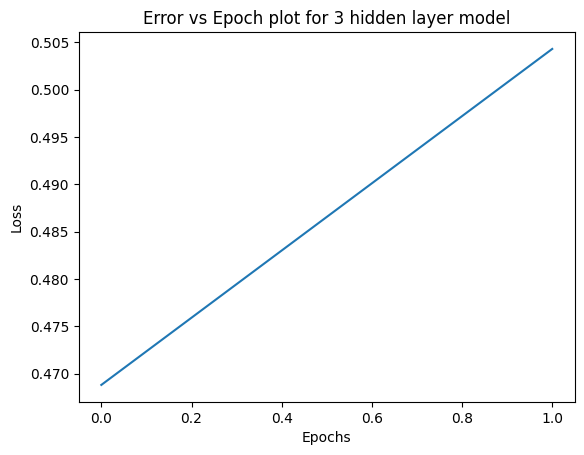

In [19]:
loss1NAG=historyNAG1.history['loss']
plt.plot(loss1NAG)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [52]:
model5.save('NAGmodel5.h5')

In [115]:
model5.evaluate(x=TrData, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)

356/356 [==============================] - 8s 21ms/step - loss: 0.4723 - accuracy: 0.8509


[0.4722532629966736, 0.8509442210197449]

In [50]:
model5.evaluate(x=ValData, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 3s 15ms/step - loss: 0.4823 - accuracy: 0.8474


[0.48229116201400757, 0.8474308252334595]

In [107]:
model11 = keras.Sequential(
    [
        Input((28,28)),
        Flatten(),
        Dense(100, activation='sigmoid', name="layer1"),
        Dense(200, activation='sigmoid', name="layer2"),
        Dense(100, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)

In [109]:
NAG=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True, name='NAG')
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',patience=1, min_delta=0.0001)]
model11.compile(optimizer=NAG,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [110]:
history2NAG = model11.fit(x=TrData,y=TrLabel,batch_size=1,epochs=10000,validation_split=0,validation_data=(ValData,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
11385/11385 [==============================] - 234s 20ms/step - loss: 0.9157 - accuracy: 0.6571 - val_loss: 0.8371 - val_accuracy: 0.6287
Epoch 2/10000
11385/11385 [==============================] - 223s 20ms/step - loss: 0.9099 - accuracy: 0.6258 - val_loss: 0.8185 - val_accuracy: 0.6727
Epoch 3/10000
11385/11385 [==============================] - 251s 22ms/step - loss: 1.1652 - accuracy: 0.4811 - val_loss: 1.5033 - val_accuracy: 0.3565


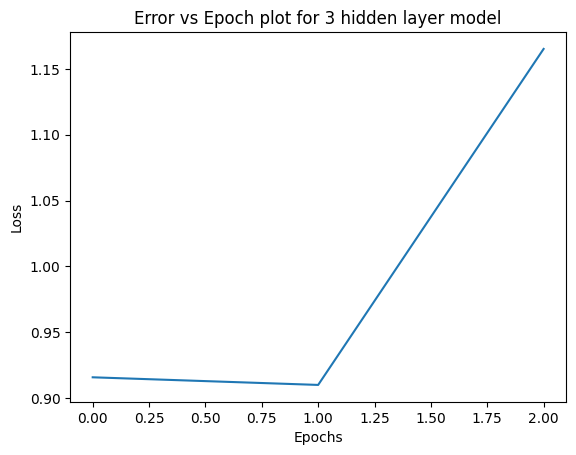

In [111]:
loss2NAG=history2NAG.history['loss']
plt.plot(loss2NAG)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [112]:
model11.save('NAGmodel11.h5')

In [113]:
model11.evaluate(x=TrData, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)

356/356 [==============================] - 6s 13ms/step - loss: 1.5036 - accuracy: 0.3585


[1.50361168384552, 0.3584541082382202]

In [114]:
model11.evaluate(x=ValData, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 2s 16ms/step - loss: 1.5033 - accuracy: 0.3565


[1.5032981634140015, 0.35652172565460205]

In [44]:
model17 = keras.Sequential(
    [
        Input((28,28)),
        Flatten(),
        Dense(200, activation='sigmoid', name="layer1"),
        Dense(300, activation='sigmoid', name="layer2"),
        Dense(500, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)

In [45]:
NAG=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True, name='NAG')
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',patience=1, min_delta=0.0001)]
model17.compile(optimizer=NAG,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [46]:
history3NAG = model17.fit(x=TrData,y=TrLabel,batch_size=1,epochs=10000,validation_split=0,validation_data=(ValData,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
11385/11385 [==============================] - 362s 31ms/step - loss: 0.7677 - accuracy: 0.7128 - val_loss: 0.6830 - val_accuracy: 0.7389
Epoch 2/10000
11385/11385 [==============================] - 304s 27ms/step - loss: 0.7901 - accuracy: 0.6912 - val_loss: 0.8366 - val_accuracy: 0.6798


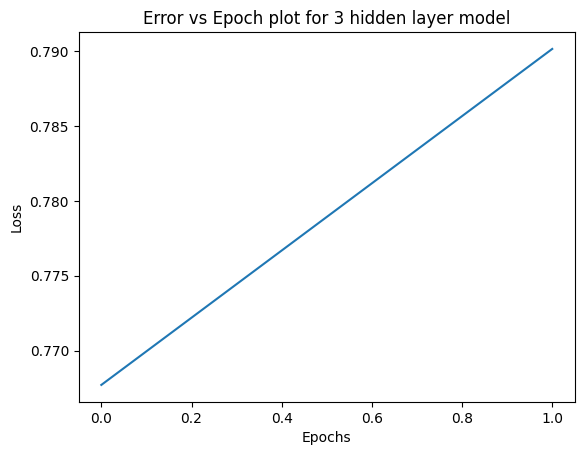

In [47]:
loss3NAG=history3NAG.history['loss']
plt.plot(loss3NAG)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [165]:
model17.save('NAGmodel17.h5')

In [166]:
model17.evaluate(x=TrData, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)

356/356 [==============================] - 9s 21ms/step - loss: 0.7910 - accuracy: 0.7055


[0.7910373210906982, 0.7054896950721741]

In [167]:
model17.evaluate(x=ValData, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 3s 21ms/step - loss: 0.8048 - accuracy: 0.7025


[0.8047559261322021, 0.7025033235549927]

Adam Optimizer

In [21]:
model6 = keras.Sequential(
    [
        Input((28,28)),
        Flatten(),
        Dense(512, activation='sigmoid', name="layer1"),
        Dense(256, activation='sigmoid', name="layer2"),
        Dense(128, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)

In [22]:
Adam1=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]
model6.compile(optimizer=Adam1,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [23]:
history = model6.fit(x=TrData,y=TrLabel,batch_size=1,epochs=10000,validation_split=0,validation_data=(ValData,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)


Epoch 1/10000
11385/11385 [==============================] - 365s 32ms/step - loss: 0.3251 - accuracy: 0.8894 - val_loss: 0.1960 - val_accuracy: 0.9378
Epoch 2/10000
11385/11385 [==============================] - 367s 32ms/step - loss: 0.1890 - accuracy: 0.9370 - val_loss: 0.2814 - val_accuracy: 0.9057
Epoch 3/10000
11385/11385 [==============================] - 501s 44ms/step - loss: 0.1540 - accuracy: 0.9505 - val_loss: 0.1308 - val_accuracy: 0.9613
Epoch 4/10000
11385/11385 [==============================] - 387s 34ms/step - loss: 0.1456 - accuracy: 0.9542 - val_loss: 0.1145 - val_accuracy: 0.9642
Epoch 5/10000
11385/11385 [==============================] - 390s 34ms/step - loss: 0.1270 - accuracy: 0.9604 - val_loss: 0.1189 - val_accuracy: 0.9631
Epoch 6/10000
11385/11385 [==============================] - 392s 34ms/step - loss: 0.1203 - accuracy: 0.9621 - val_loss: 0.1043 - val_accuracy: 0.9671
Epoch 7/10000
11385/11385 [==============================] - 301s 26ms/step - loss: 0.11

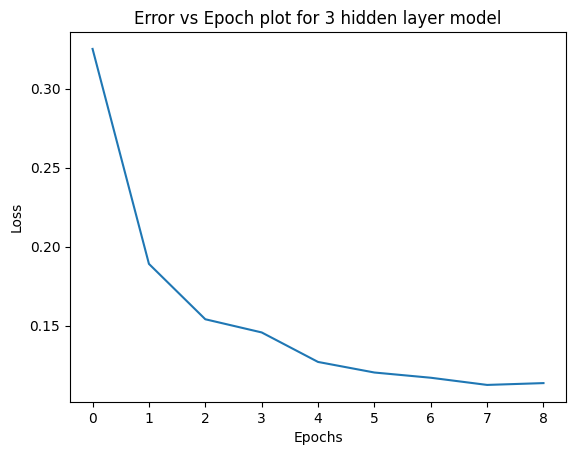

In [24]:
loss1Adam=history.history['loss']
plt.plot(loss1Adam)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [53]:
model6.save('AdamModel6.h5')

In [54]:
model6.evaluate(x=TrData, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)

356/356 [==============================] - 7s 15ms/step - loss: 0.0908 - accuracy: 0.9716


[0.09082826972007751, 0.9716293215751648]

In [55]:
model6.evaluate(x=ValData, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 2s 18ms/step - loss: 0.1096 - accuracy: 0.9676


[0.10956861078739166, 0.9675889611244202]

In [3]:
model = keras.models.load_model("AdamModel6.h5")

In [8]:
pTr=model.predict(x=TrData,batch_size=None,verbose="auto",callbacks=None)

356/356 [==============================] - 5s 14ms/step


In [13]:
Trconfusion_matrix = metrics.confusion_matrix(TrLabel,pTr)#,labels=[[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]])
Trdisp=metrics.ConfusionMatrixDisplay(confusion_matrix=Trconfusion_matrix)
plt.plot(Trdisp)
plt.show()

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [18]:
Tr=[]
Trl=[]
for i in range(len(TrData)):
    Tr.append(np.argmax(TrLabel[i]))
    Trl.append(np.argmax(pTr[i]))
TrConf=tf.math.confusion_matrix(labels=Tr,predictions=Trl)

In [19]:
TrConf

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[2205,    1,   19,   50,    2],
       [   2, 2183,   14,   56,   22],
       [  12,    8, 2210,   43,    4],
       [   7,    3,   17, 2249,    1],
       [  13,   13,   31,    5, 2215]])>

In [9]:
model.evaluate(x=TrData, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)

356/356 [==============================] - 6s 15ms/step - loss: 0.0908 - accuracy: 0.9716


[0.09082826972007751, 0.9716293215751648]

In [20]:
pTest=model.predict(x=TestData,batch_size=None,verbose="auto",callbacks=None)

119/119 [==============================] - 2s 17ms/step


In [21]:
Test=[]
Testl=[]
for i in range(len(TestData)):
    Test.append(np.argmax(TestLabel[i]))
    Testl.append(np.argmax(pTest[i]))
TestConf=tf.math.confusion_matrix(labels=Test,predictions=Testl)

In [22]:
TestConf

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[737,   1,   7,  11,   3],
       [  0, 728,   8,  14,   9],
       [  6,   3, 736,  12,   2],
       [  3,   0,  13, 743,   0],
       [  2,   5,   8,   6, 738]])>

In [10]:
model.evaluate(x=TestData, y=TestLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 2s 17ms/step - loss: 0.1181 - accuracy: 0.9702


[0.11812978982925415, 0.9702239632606506]

In [116]:
model12 = keras.Sequential(
    [
        Input((28,28)),
        Flatten(),
        Dense(100, activation='sigmoid', name="layer1"),
        Dense(200, activation='sigmoid', name="layer2"),
        Dense(100, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)

In [117]:
Adam1=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]
model12.compile(optimizer=Adam1,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [118]:
history2Adam = model12.fit(x=TrData,y=TrLabel,batch_size=1,epochs=10000,validation_split=0,validation_data=(ValData,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)


Epoch 1/10000
11385/11385 [==============================] - 230s 20ms/step - loss: 0.4110 - accuracy: 0.8528 - val_loss: 0.2347 - val_accuracy: 0.9228
Epoch 2/10000
11385/11385 [==============================] - 130s 11ms/step - loss: 0.2206 - accuracy: 0.9277 - val_loss: 0.1880 - val_accuracy: 0.9394
Epoch 3/10000
11385/11385 [==============================] - 123s 11ms/step - loss: 0.1760 - accuracy: 0.9426 - val_loss: 0.1721 - val_accuracy: 0.9476
Epoch 4/10000
11385/11385 [==============================] - 126s 11ms/step - loss: 0.1634 - accuracy: 0.9466 - val_loss: 0.1424 - val_accuracy: 0.9547
Epoch 5/10000
11385/11385 [==============================] - 136s 12ms/step - loss: 0.1414 - accuracy: 0.9545 - val_loss: 0.1326 - val_accuracy: 0.9557
Epoch 6/10000
11385/11385 [==============================] - 144s 13ms/step - loss: 0.1305 - accuracy: 0.9595 - val_loss: 0.1510 - val_accuracy: 0.9534
Epoch 7/10000
11385/11385 [==============================] - 139s 12ms/step - loss: 0.11

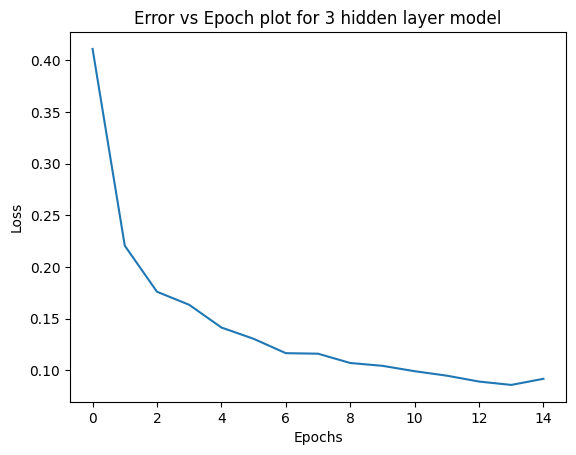

In [119]:
loss2Adam=history2Adam.history['loss']
plt.plot(loss2Adam)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [120]:
model12.save('AdamModel12.h5')

In [121]:
model12.evaluate(x=TrData, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)

356/356 [==============================] - 7s 16ms/step - loss: 0.0927 - accuracy: 0.9710


[0.092735655605793, 0.9710144996643066]

In [122]:
model12.evaluate(x=ValData, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 2s 12ms/step - loss: 0.1200 - accuracy: 0.9647


[0.12002634257078171, 0.9646903872489929]

In [7]:
model19 = keras.Sequential(
    [
        Input((28,28)),
        Flatten(),
        Dense(200, activation='sigmoid', name="layer1"),
        Dense(300, activation='sigmoid', name="layer2"),
        Dense(500, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)

In [8]:
Adam1=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]
model19.compile(optimizer=Adam1,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [9]:
history3Adam = model19.fit(x=TrData,y=TrLabel,batch_size=1,epochs=10000,validation_split=0,validation_data=(ValData,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)


Epoch 1/10000
11385/11385 [==============================] - 289s 25ms/step - loss: 0.3997 - accuracy: 0.8574 - val_loss: 0.2529 - val_accuracy: 0.9246
Epoch 2/10000
11385/11385 [==============================] - 255s 22ms/step - loss: 0.2440 - accuracy: 0.9204 - val_loss: 0.1773 - val_accuracy: 0.9449
Epoch 3/10000
11385/11385 [==============================] - 258s 23ms/step - loss: 0.1863 - accuracy: 0.9417 - val_loss: 0.1598 - val_accuracy: 0.9520
Epoch 4/10000
11385/11385 [==============================] - 204s 18ms/step - loss: 0.1634 - accuracy: 0.9505 - val_loss: 0.1348 - val_accuracy: 0.9586
Epoch 5/10000
11385/11385 [==============================] - 225s 20ms/step - loss: 0.1495 - accuracy: 0.9549 - val_loss: 0.1394 - val_accuracy: 0.9547
Epoch 6/10000
11385/11385 [==============================] - 226s 20ms/step - loss: 0.1455 - accuracy: 0.9571 - val_loss: 0.1496 - val_accuracy: 0.9520
Epoch 7/10000
11385/11385 [==============================] - 191s 17ms/step - loss: 0.13

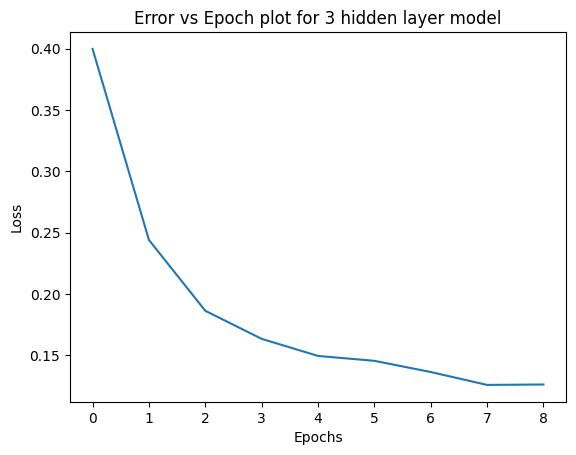

In [10]:
loss3Adam=history3Adam.history['loss']
plt.plot(loss3Adam)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [11]:
model19.save('AdamModel19.h5')

In [12]:
model19.evaluate(x=TrData, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)

356/356 [==============================] - 6s 13ms/step - loss: 0.1084 - accuracy: 0.9664


[0.10842867195606232, 0.9664470553398132]

In [13]:
model19.evaluate(x=ValData, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 2s 13ms/step - loss: 0.1235 - accuracy: 0.9605


[0.12350250780582428, 0.9604743123054504]

RMSProp Optimizer

In [56]:
model7 = keras.Sequential(
    [
        Input((28,28)),
        Flatten(),
        Dense(512, activation='sigmoid', name="layer1"),
        Dense(256, activation='sigmoid', name="layer2"),
        Dense(128, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)

In [57]:
RMSProp=keras.optimizers.RMSprop(learning_rate=0.001, rho=0.99, epsilon=1e-08, name="RMSProp")
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]
model7.compile(optimizer=RMSProp,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [58]:
history1RMSProp = model7.fit(x=TrData,y=TrLabel,batch_size=1,epochs=10000,validation_split=0,validation_data=(ValData,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
11385/11385 [==============================] - 392s 34ms/step - loss: 0.2739 - accuracy: 0.9099 - val_loss: 0.1254 - val_accuracy: 0.9631
Epoch 2/10000
11385/11385 [==============================] - 338s 30ms/step - loss: 0.1521 - accuracy: 0.9563 - val_loss: 0.1401 - val_accuracy: 0.9623
Epoch 3/10000
11385/11385 [==============================] - 319s 28ms/step - loss: 0.1450 - accuracy: 0.9634 - val_loss: 0.1333 - val_accuracy: 0.9628
Epoch 4/10000
11385/11385 [==============================] - 315s 28ms/step - loss: 0.1273 - accuracy: 0.9661 - val_loss: 0.1123 - val_accuracy: 0.9739
Epoch 5/10000
11385/11385 [==============================] - 324s 28ms/step - loss: 0.1206 - accuracy: 0.9695 - val_loss: 0.1581 - val_accuracy: 0.9655
Epoch 6/10000
11385/11385 [==============================] - 319s 28ms/step - loss: 0.1150 - accuracy: 0.9715 - val_loss: 0.1198 - val_accuracy: 0.9700
Epoch 7/10000
11385/11385 [==============================] - 314s 28ms/step - loss: 0.11

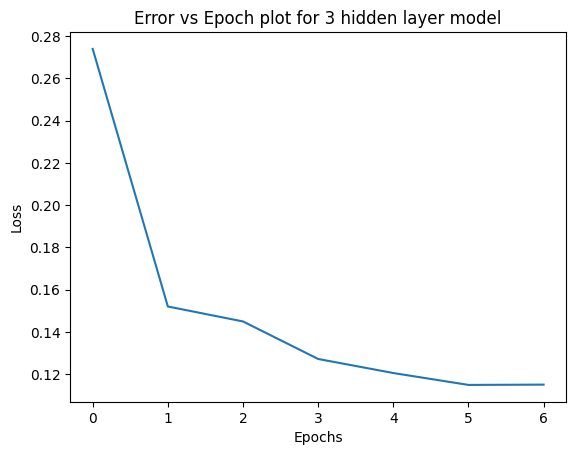

In [59]:
loss1RMSProp=history1RMSProp.history['loss']
plt.plot(loss1RMSProp)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [60]:
model7.save('RMSPropModel7.h5')

In [61]:
model7.evaluate(x=TrData, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)

356/356 [==============================] - 8s 15ms/step - loss: 0.0837 - accuracy: 0.9773


[0.08367490768432617, 0.9773386120796204]

In [62]:
model7.evaluate(x=ValData, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 2s 15ms/step - loss: 0.0990 - accuracy: 0.9715


[0.0989699587225914, 0.9715415239334106]

In [123]:
model13 = keras.Sequential(
    [
        Input((28,28)),
        Flatten(),
        Dense(100, activation='sigmoid', name="layer1"),
        Dense(200, activation='sigmoid', name="layer2"),
        Dense(100, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)

In [124]:
RMSProp=keras.optimizers.RMSprop(learning_rate=0.001, rho=0.99, epsilon=1e-08, name="RMSProp")
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]
model13.compile(optimizer=RMSProp,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [125]:
history2RMSProp = model13.fit(x=TrData,y=TrLabel,batch_size=1,epochs=10000,validation_split=0,validation_data=(ValData,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
11385/11385 [==============================] - 216s 19ms/step - loss: 0.3252 - accuracy: 0.8870 - val_loss: 0.1752 - val_accuracy: 0.9470
Epoch 2/10000
11385/11385 [==============================] - 144s 13ms/step - loss: 0.1760 - accuracy: 0.9475 - val_loss: 0.1689 - val_accuracy: 0.9594
Epoch 3/10000
11385/11385 [==============================] - 151s 13ms/step - loss: 0.1547 - accuracy: 0.9539 - val_loss: 0.1571 - val_accuracy: 0.9549
Epoch 4/10000
11385/11385 [==============================] - 141s 12ms/step - loss: 0.1393 - accuracy: 0.9602 - val_loss: 0.1245 - val_accuracy: 0.9636
Epoch 5/10000
11385/11385 [==============================] - 173s 15ms/step - loss: 0.1348 - accuracy: 0.9624 - val_loss: 0.1328 - val_accuracy: 0.9605
Epoch 6/10000
11385/11385 [==============================] - 192s 17ms/step - loss: 0.1242 - accuracy: 0.9649 - val_loss: 0.1371 - val_accuracy: 0.9663
Epoch 7/10000
11385/11385 [==============================] - 173s 15ms/step - loss: 0.12

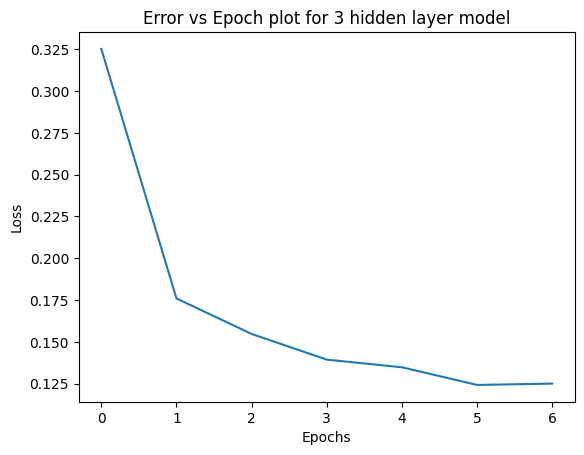

In [126]:
loss2RMSProp=history2RMSProp.history['loss']
plt.plot(loss2RMSProp)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [22]:
model13.save('RMSPropModel13.h5')

NameError: name 'model13' is not defined

In [128]:
model13.evaluate(x=TrData, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)

356/356 [==============================] - 7s 13ms/step - loss: 0.1104 - accuracy: 0.9725


[0.11041407287120819, 0.9725077152252197]

In [129]:
model13.evaluate(x=ValData, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 2s 13ms/step - loss: 0.1177 - accuracy: 0.9715


[0.11770321428775787, 0.9715415239334106]

In [18]:
model20 = keras.Sequential(
    [
        Input((28,28)),
        Flatten(),
        Dense(200, activation='sigmoid', name="layer1"),
        Dense(300, activation='sigmoid', name="layer2"),
        Dense(500, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)

In [19]:
RMSProp=keras.optimizers.RMSprop(learning_rate=0.001, rho=0.99, epsilon=1e-08, name="RMSProp")
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]
model20.compile(optimizer=RMSProp,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [20]:
history3RMSProp = model20.fit(x=TrData,y=TrLabel,batch_size=1,epochs=10000,validation_split=0,validation_data=(ValData,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
11385/11385 [==============================] - 231s 20ms/step - loss: 0.3071 - accuracy: 0.8986 - val_loss: 0.1673 - val_accuracy: 0.9507
Epoch 2/10000
11385/11385 [==============================] - 214s 19ms/step - loss: 0.1701 - accuracy: 0.9503 - val_loss: 0.1236 - val_accuracy: 0.9652
Epoch 3/10000
11385/11385 [==============================] - 221s 19ms/step - loss: 0.1521 - accuracy: 0.9583 - val_loss: 0.1252 - val_accuracy: 0.9710
Epoch 4/10000
11385/11385 [==============================] - 210s 18ms/step - loss: 0.1417 - accuracy: 0.9618 - val_loss: 0.1568 - val_accuracy: 0.9599
Epoch 5/10000
11385/11385 [==============================] - 215s 19ms/step - loss: 0.1289 - accuracy: 0.9658 - val_loss: 0.1886 - val_accuracy: 0.9568
Epoch 6/10000
11385/11385 [==============================] - 217s 19ms/step - loss: 0.1245 - accuracy: 0.9694 - val_loss: 0.0993 - val_accuracy: 0.9739
Epoch 7/10000
11385/11385 [==============================] - 234s 21ms/step - loss: 0.12

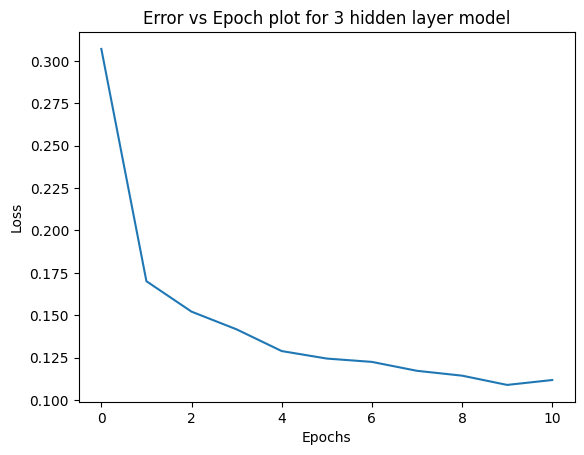

In [25]:
loss3RMSProp=history3RMSProp.history['loss']
plt.plot(loss3RMSProp)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [26]:
model20.save('RMSPropModel20.h5')

In [27]:
model20.evaluate(x=TrData, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)

356/356 [==============================] - 6s 13ms/step - loss: 0.1063 - accuracy: 0.9761


[0.10634682327508926, 0.9761089086532593]

In [28]:
model20.evaluate(x=ValData, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 2s 13ms/step - loss: 0.1427 - accuracy: 0.9713


[0.1426892876625061, 0.9712780117988586]

Vanilla Gradient Descent

In [69]:
model8 = keras.Sequential(
    [
        Input((28,28)),
        Flatten(),
        Dense(512, activation='sigmoid', name="layer1"),
        Dense(256, activation='sigmoid', name="layer2"),
        Dense(128, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)

In [70]:
BatchGD=keras.optimizers.SGD(learning_rate=0.001, name="VanillaGradientDescent")
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]
model8.compile(optimizer=BatchGD,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [71]:
history1VGD = model8.fit(x=TrData,y=TrLabel,batch_size=len(TrData),epochs=10000,validation_data=(ValData,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks,validation_split=0)

Epoch 1/10000
1/1 [==============================] - 13s 13s/step - loss: 1.8341 - accuracy: 0.2010 - val_loss: 1.8305 - val_accuracy: 0.2016
Epoch 2/10000
1/1 [==============================] - 3s 3s/step - loss: 1.8305 - accuracy: 0.2011 - val_loss: 1.8270 - val_accuracy: 0.2018
Epoch 3/10000
1/1 [==============================] - 3s 3s/step - loss: 1.8269 - accuracy: 0.2013 - val_loss: 1.8235 - val_accuracy: 0.2021
Epoch 4/10000
1/1 [==============================] - 3s 3s/step - loss: 1.8234 - accuracy: 0.2015 - val_loss: 1.8200 - val_accuracy: 0.2021
Epoch 5/10000
1/1 [==============================] - 3s 3s/step - loss: 1.8200 - accuracy: 0.2015 - val_loss: 1.8167 - val_accuracy: 0.2021
Epoch 6/10000
1/1 [==============================] - 3s 3s/step - loss: 1.8166 - accuracy: 0.2016 - val_loss: 1.8133 - val_accuracy: 0.2024
Epoch 7/10000
1/1 [==============================] - 3s 3s/step - loss: 1.8132 - accuracy: 0.2017 - val_loss: 1.8100 - val_accuracy: 0.2021
Epoch 8/10000
1/1 

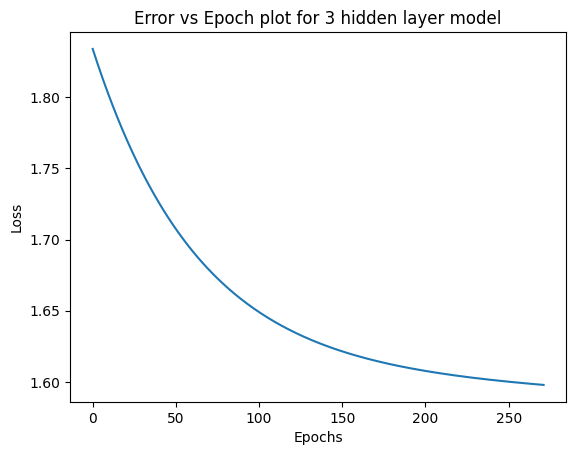

In [72]:
loss1VGD=history1VGD.history['loss']
plt.plot(loss1VGD)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [73]:
model8.save('VGDModel8.h5')

In [76]:
model8.evaluate(x=TrData, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)

356/356 [==============================] - 7s 19ms/step - loss: 1.5977 - accuracy: 0.3097


[1.597745418548584, 0.3097057640552521]

In [75]:
model8.evaluate(x=ValData, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 2s 18ms/step - loss: 1.5983 - accuracy: 0.3096


[1.5983203649520874, 0.30961790680885315]

In [130]:
model14 = keras.Sequential(
    [
        Input((28,28)),
        Flatten(),
        Dense(100, activation='sigmoid', name="layer1"),
        Dense(200, activation='sigmoid', name="layer2"),
        Dense(100, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)

In [131]:
BatchGD=keras.optimizers.SGD(learning_rate=0.001, name="VanillaGradientDescent")
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]
model14.compile(optimizer=BatchGD,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [133]:
history2VGD = model14.fit(x=TrData,y=TrLabel,batch_size=len(TrData),epochs=10000,validation_data=(ValData,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks,validation_split=0)

Epoch 1/10000
1/1 [==============================] - 8s 8s/step - loss: 1.6771 - accuracy: 0.1293 - val_loss: 1.6757 - val_accuracy: 0.1252
Epoch 2/10000
1/1 [==============================] - 1s 952ms/step - loss: 1.6762 - accuracy: 0.1296 - val_loss: 1.6748 - val_accuracy: 0.1257
Epoch 3/10000
1/1 [==============================] - 1s 983ms/step - loss: 1.6753 - accuracy: 0.1296 - val_loss: 1.6739 - val_accuracy: 0.1257
Epoch 4/10000
1/1 [==============================] - 2s 2s/step - loss: 1.6745 - accuracy: 0.1296 - val_loss: 1.6730 - val_accuracy: 0.1254
Epoch 5/10000
1/1 [==============================] - 2s 2s/step - loss: 1.6736 - accuracy: 0.1297 - val_loss: 1.6722 - val_accuracy: 0.1254
Epoch 6/10000
1/1 [==============================] - 1s 1s/step - loss: 1.6727 - accuracy: 0.1296 - val_loss: 1.6713 - val_accuracy: 0.1254
Epoch 7/10000
1/1 [==============================] - 1s 860ms/step - loss: 1.6719 - accuracy: 0.1298 - val_loss: 1.6705 - val_accuracy: 0.1254
Epoch 8/100

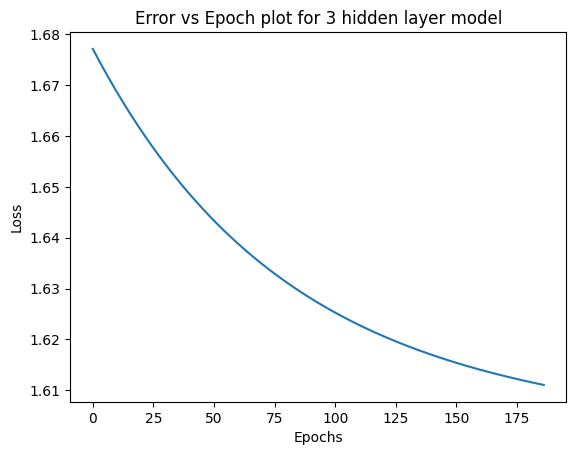

In [134]:
loss2VGD=history2VGD.history['loss']
plt.plot(loss2VGD)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [135]:
model14.save('VGDModel14.h5')

In [136]:
model14.evaluate(x=TrData, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)

356/356 [==============================] - 6s 16ms/step - loss: 1.6110 - accuracy: 0.1549


[1.610954999923706, 0.15494070947170258]

In [137]:
model14.evaluate(x=ValData, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 2s 16ms/step - loss: 1.6105 - accuracy: 0.1481


[1.6105258464813232, 0.14808958768844604]

In [29]:
model21 = keras.Sequential(
    [
        Input((28,28)),
        Flatten(),
        Dense(200, activation='sigmoid', name="layer1"),
        Dense(300, activation='sigmoid', name="layer2"),
        Dense(500, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)

In [30]:
BatchGD=keras.optimizers.SGD(learning_rate=0.001, name="VanillaGradientDescent")
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]
model21.compile(optimizer=BatchGD,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [31]:
history3VGD = model21.fit(x=TrData,y=TrLabel,batch_size=len(TrData),epochs=10000,validation_data=(ValData,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks,validation_split=0)

Epoch 1/10000
1/1 [==============================] - 6s 6s/step - loss: 1.7103 - accuracy: 0.2000 - val_loss: 1.7051 - val_accuracy: 0.2000
Epoch 2/10000
1/1 [==============================] - 3s 3s/step - loss: 1.7046 - accuracy: 0.2000 - val_loss: 1.6997 - val_accuracy: 0.2000
Epoch 3/10000
1/1 [==============================] - 3s 3s/step - loss: 1.6992 - accuracy: 0.2000 - val_loss: 1.6946 - val_accuracy: 0.2000
Epoch 4/10000
1/1 [==============================] - 3s 3s/step - loss: 1.6941 - accuracy: 0.2000 - val_loss: 1.6897 - val_accuracy: 0.2000
Epoch 5/10000
1/1 [==============================] - 3s 3s/step - loss: 1.6892 - accuracy: 0.2000 - val_loss: 1.6852 - val_accuracy: 0.2000
Epoch 6/10000
1/1 [==============================] - 4s 4s/step - loss: 1.6847 - accuracy: 0.2000 - val_loss: 1.6809 - val_accuracy: 0.2000
Epoch 7/10000
1/1 [==============================] - 4s 4s/step - loss: 1.6804 - accuracy: 0.2000 - val_loss: 1.6768 - val_accuracy: 0.2000
Epoch 8/10000
1/1 [=

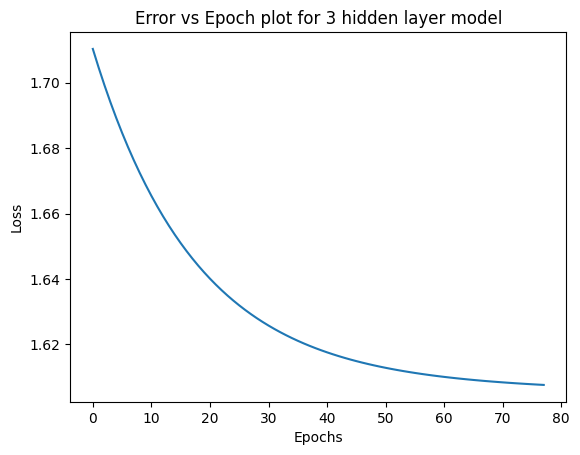

In [32]:
loss3VGD=history3VGD.history['loss']
plt.plot(loss3VGD)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [33]:
model21.save('VGDModel21.h5')

In [34]:
model21.evaluate(x=TrData, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)

356/356 [==============================] - 5s 12ms/step - loss: 1.6075 - accuracy: 0.2127


[1.6074906587600708, 0.21273605525493622]

In [43]:
model21.evaluate(x=ValData, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 2s 16ms/step - loss: 1.6081 - accuracy: 0.2113


[1.6081006526947021, 0.21133069694042206]

AdaGrad Optimizer

In [77]:
model9 = keras.Sequential(
    [
        Input((28,28)),
        Flatten(),
        Dense(512, activation='sigmoid', name="layer1"),
        Dense(256, activation='sigmoid', name="layer2"),
        Dense(128, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)

In [78]:
AdaGrad=keras.optimizers.Adagrad(learning_rate=0.001, epsilon=1e-07, name="Adagrad")
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]
model9.compile(optimizer=AdaGrad,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [79]:
history1AdaGrad = model9.fit(x=TrData,y=TrLabel,batch_size=1,epochs=10000,validation_split=0,validation_data=(ValData,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
11385/11385 [==============================] - 340s 30ms/step - loss: 1.0342 - accuracy: 0.8333 - val_loss: 0.5793 - val_accuracy: 0.9354
Epoch 2/10000
11385/11385 [==============================] - 338s 30ms/step - loss: 0.4178 - accuracy: 0.9411 - val_loss: 0.3136 - val_accuracy: 0.9505
Epoch 3/10000
11385/11385 [==============================] - 326s 29ms/step - loss: 0.2633 - accuracy: 0.9529 - val_loss: 0.2328 - val_accuracy: 0.9570
Epoch 4/10000
11385/11385 [==============================] - 321s 28ms/step - loss: 0.2016 - accuracy: 0.9616 - val_loss: 0.1938 - val_accuracy: 0.9594
Epoch 5/10000
11385/11385 [==============================] - 323s 28ms/step - loss: 0.1677 - accuracy: 0.9661 - val_loss: 0.1721 - val_accuracy: 0.9634
Epoch 6/10000
11385/11385 [==============================] - 326s 29ms/step - loss: 0.1452 - accuracy: 0.9695 - val_loss: 0.1575 - val_accuracy: 0.9636
Epoch 7/10000
11385/11385 [==============================] - 340s 30ms/step - loss: 0.12

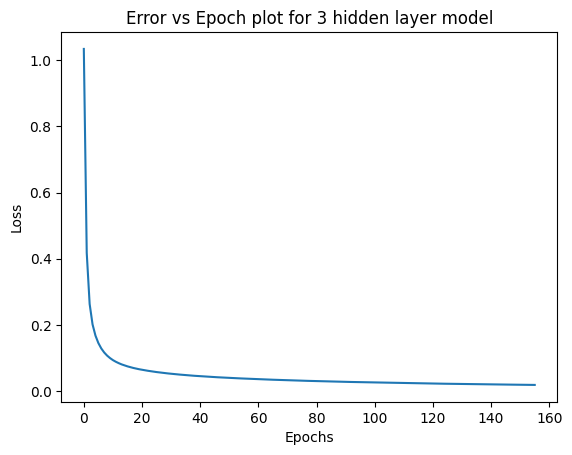

In [80]:
loss1AdaGrad=history1AdaGrad.history['loss']
plt.plot(loss1AdaGrad)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [81]:
model9.save('AdaGradModel9.h5')

In [82]:
model9.evaluate(x=TrData, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)

356/356 [==============================] - 9s 17ms/step - loss: 0.0185 - accuracy: 0.9953


[0.01849369704723358, 0.9953447580337524]

In [83]:
model9.evaluate(x=ValData, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 3s 20ms/step - loss: 0.0829 - accuracy: 0.9760


[0.08289089053869247, 0.9760210514068604]

In [138]:
model15 = keras.Sequential(
    [
        Input((28,28)),
        Flatten(),
        Dense(100, activation='sigmoid', name="layer1"),
        Dense(200, activation='sigmoid', name="layer2"),
        Dense(100, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)

In [139]:
AdaGrad=keras.optimizers.Adagrad(learning_rate=0.001, epsilon=1e-07, name="Adagrad")
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]
model15.compile(optimizer=AdaGrad,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [140]:
history2AdaGrad = model15.fit(x=TrData,y=TrLabel,batch_size=1,epochs=10000,validation_split=0,validation_data=(ValData,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
11385/11385 [==============================] - 269s 23ms/step - loss: 1.4215 - accuracy: 0.6848 - val_loss: 1.2065 - val_accuracy: 0.7871
Epoch 2/10000
11385/11385 [==============================] - 205s 18ms/step - loss: 1.0104 - accuracy: 0.8594 - val_loss: 0.8406 - val_accuracy: 0.8819
Epoch 3/10000
11385/11385 [==============================] - 182s 16ms/step - loss: 0.7257 - accuracy: 0.9062 - val_loss: 0.6306 - val_accuracy: 0.9159
Epoch 4/10000
11385/11385 [==============================] - 157s 14ms/step - loss: 0.5567 - accuracy: 0.9271 - val_loss: 0.5001 - val_accuracy: 0.9267
Epoch 5/10000
11385/11385 [==============================] - 171s 15ms/step - loss: 0.4480 - accuracy: 0.9368 - val_loss: 0.4144 - val_accuracy: 0.9331
Epoch 6/10000
11385/11385 [==============================] - 170s 15ms/step - loss: 0.3735 - accuracy: 0.9429 - val_loss: 0.3546 - val_accuracy: 0.9418
Epoch 7/10000
11385/11385 [==============================] - 167s 15ms/step - loss: 0.32

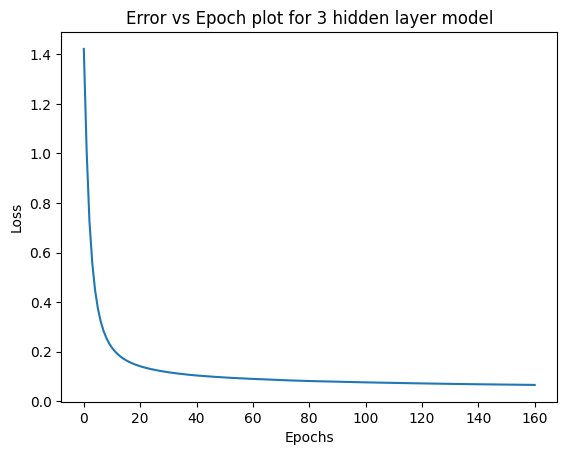

In [141]:
loss2AdaGrad=history2AdaGrad.history['loss']
plt.plot(loss2AdaGrad)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [142]:
model15.save('AdaGradModel15.h5')

In [143]:
model15.evaluate(x=TrData, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)

356/356 [==============================] - 10s 21ms/step - loss: 0.0658 - accuracy: 0.9801


[0.06582754105329514, 0.9800614714622498]

In [144]:
model15.evaluate(x=ValData, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 3s 19ms/step - loss: 0.1161 - accuracy: 0.9636


[0.11608604341745377, 0.9636363387107849]

In [35]:
model18 = keras.Sequential(
    [
        Input((28,28)),
        Flatten(),
        Dense(200, activation='sigmoid', name="layer1"),
        Dense(300, activation='sigmoid', name="layer2"),
        Dense(500, activation='sigmoid', name="layer3"),
        Dense(5, activation='softmax')
    ]
)

In [36]:
AdaGrad=keras.optimizers.Adagrad(learning_rate=0.001, epsilon=1e-07, name="Adagrad")
my_callbacks=[keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]
model18.compile(optimizer=AdaGrad,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [37]:
history3AdaGrad = model18.fit(x=TrData,y=TrLabel,batch_size=1,epochs=10000,validation_split=0,validation_data=(ValData,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto",callbacks=my_callbacks)

Epoch 1/10000
11385/11385 [==============================] - 199s 17ms/step - loss: 1.2246 - accuracy: 0.7109 - val_loss: 0.7619 - val_accuracy: 0.8912
Epoch 2/10000
11385/11385 [==============================] - 179s 16ms/step - loss: 0.5233 - accuracy: 0.9207 - val_loss: 0.3757 - val_accuracy: 0.9310
Epoch 3/10000
11385/11385 [==============================] - 190s 17ms/step - loss: 0.3024 - accuracy: 0.9405 - val_loss: 0.2624 - val_accuracy: 0.9444
Epoch 4/10000
11385/11385 [==============================] - 222s 19ms/step - loss: 0.2244 - accuracy: 0.9482 - val_loss: 0.2147 - val_accuracy: 0.9465
Epoch 5/10000
11385/11385 [==============================] - 244s 21ms/step - loss: 0.1848 - accuracy: 0.9550 - val_loss: 0.1887 - val_accuracy: 0.9505
Epoch 6/10000
11385/11385 [==============================] - 226s 20ms/step - loss: 0.1606 - accuracy: 0.9589 - val_loss: 0.1729 - val_accuracy: 0.9539
Epoch 7/10000
11385/11385 [==============================] - 222s 19ms/step - loss: 0.14

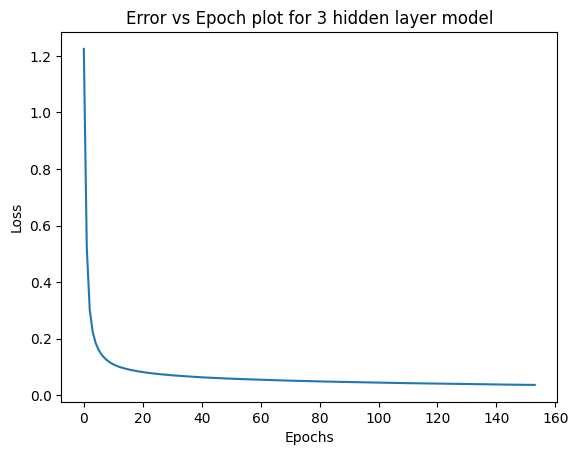

In [38]:
loss3AdaGrad=history3AdaGrad.history['loss']
plt.plot(loss3AdaGrad)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model")
plt.show()

In [39]:
model18.save('AdaGradModel18.h5')

In [40]:
model18.evaluate(x=TrData, y=TrLabel, batch_size=None, verbose="auto",callbacks=None)

356/356 [==============================] - 8s 17ms/step - loss: 0.0360 - accuracy: 0.9903


[0.03601188585162163, 0.990338146686554]

In [41]:
model18.evaluate(x=ValData, y=ValLabel, batch_size=None, verbose="auto",callbacks=None)

119/119 [==============================] - 2s 18ms/step - loss: 0.0985 - accuracy: 0.9692


[0.09850015491247177, 0.9691699743270874]

Comparision among different optimizer

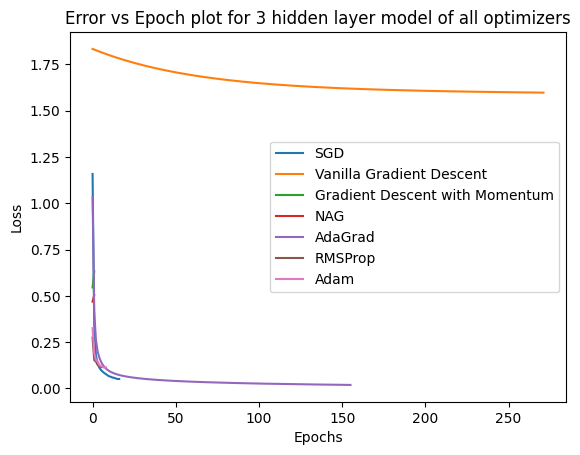

In [84]:
plt.plot(loss1SGD, label="SGD")
plt.plot(loss1VGD,label="Vanilla Gradient Descent")
plt.plot(loss1MSGD,label="Gradient Descent with Momentum")
plt.plot(loss1NAG,label="NAG")
plt.plot(loss1AdaGrad,label="AdaGrad")
plt.plot(loss1RMSProp,label="RMSProp")
plt.plot(loss1Adam,label="Adam")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model of all optimizers")
plt.show()

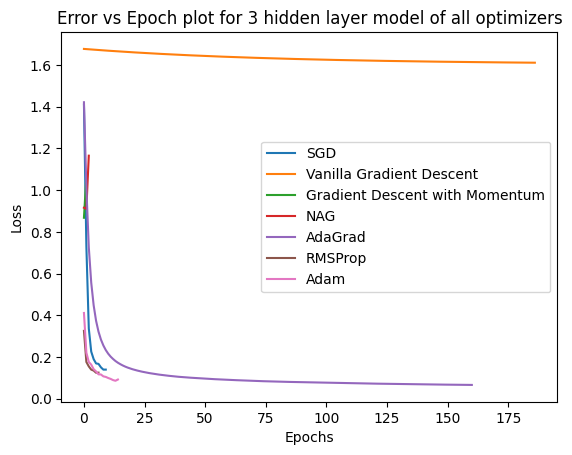

In [145]:
plt.plot(loss2SGD, label="SGD")
plt.plot(loss2VGD,label="Vanilla Gradient Descent")
plt.plot(loss2MSGD,label="Gradient Descent with Momentum")
plt.plot(loss2NAG,label="NAG")
plt.plot(loss2AdaGrad,label="AdaGrad")
plt.plot(loss2RMSProp,label="RMSProp")
plt.plot(loss2Adam,label="Adam")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model of all optimizers")
plt.show()

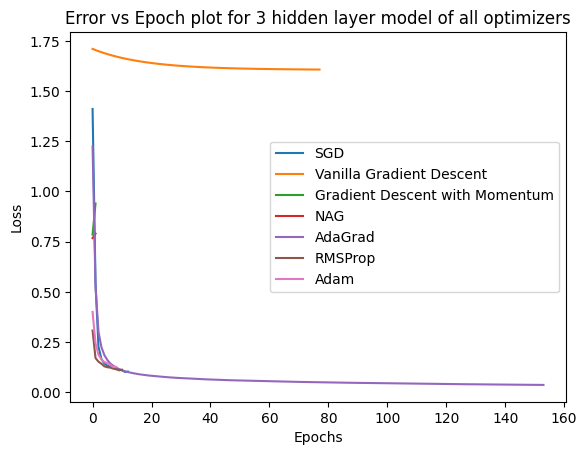

In [58]:
plt.plot(loss3SGD, label="SGD")
plt.plot(loss3VGD,label="Vanilla Gradient Descent")
plt.plot(loss3MSGD,label="Gradient Descent with Momentum")
plt.plot(loss3NAG,label="NAG")
plt.plot(loss3AdaGrad,label="AdaGrad")
plt.plot(loss3RMSProp,label="RMSProp")
plt.plot(loss3Adam,label="Adam")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Error vs Epoch plot for 3 hidden layer model of all optimizers")
plt.show()